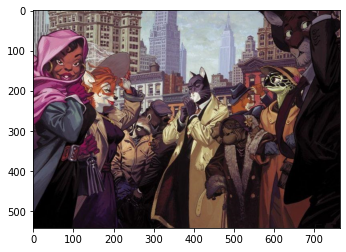

In [1]:
import matplotlib.pyplot as plt
#Chargement de l’image public .bmp dans la variable image_public
image_secret=plt.imread("image_secret.bmp")
image_public=plt.imread("public.bmp")
#Affichage de l’image
plt.imshow(image_public) 
plt.show()

Un premier filtre
passage en niveau de gris


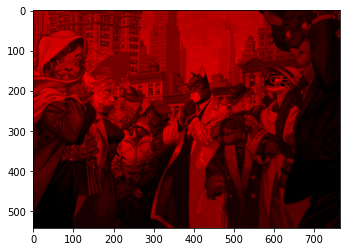

In [2]:
def surprise(image):
    result=image.copy();
    y=image.shape[0]
    x=image.shape[1]
    for i in range(y):
        for j in range(x):
            for k in range(3):
                if k==1 or k==2:
                    result[i,j,k]=0
    return result


s=surprise(image_public)
plt.imshow(s) 
plt.show()


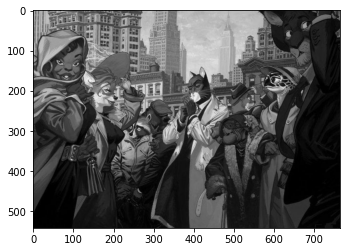

In [3]:
def surprise(image):
    result=image.copy();
    y=image.shape[0]
    x=image.shape[1]
    for i in range(y):
        for j in range(x):
            for k in range(3):
                result[i,j,k]= int(round(0.299*image[i,j,0] + 0.587*image[i,j,1] + 0.114*image[i,j,2]))
    return result


NG=surprise(image_public)
plt.imshow(NG) 
plt.show()



In [4]:
def symetrie(image):
    
    y=image.shape[0]
    x=image.shape[1]
    for i in range(y):
        for j in range(x):
            for k in range(3):
                result[i,j,k]=image[j,i,k]
    return result

sym=symetrie(image_public)
plt.imshow(sym) 
plt.show()

NameError: name 'result' is not defined

In [ ]:
image_public.shape

Ecrire un filtre pour le vert

In [ ]:
#Determination du niveau de rouge du pixel du coin superieur gauche:
image_public[0,0,0]

### Masque binaire

Dans un premier temps, on va passer les quatre bits de poids faible à la valeur 0. Pour cela, on peut utiliser l’opérateur `&` qui permet de réaliser l’opération logique "et" bit à bit.



In [ ]:
a=bin(23)
b=bin(145)
print(a,b)


In [ ]:
print(bin(0b10111&0b10010001))

In [ ]:
print(23&145)

1. Comment utiliser l’opérateur `&` pour ne conserver que les 4 bits de poids forts d’un octet (les autres prennent la valeur 0) ?

2. Créer une fonction poids_fort transformant un octet (entré en base 10) de sorte à passer ses 4 bits de poids faibles à 0. La fonction doit retourner un octet (en base 10).

Par exemple la fonction appliquée à 255 (qui s’écrit $(11111111)_2$) doit retourner 240 $(11110000)_2$) 


In [ ]:
def poids_fort(n):
    return(n&240)

poids_fort(12)

écrire une fonction image_fort permettant de ne conserver que les 4 bits de poids fort pour chaque niveau de couleur de chaque pixel.

Pour vérifier que la troncature n’altère pas trop le rendu visuel de l’image, on peut sauvegarder l’image tronquée sur le disque et visualiser côte-à-côte les images originales et tronquées.

In [ ]:
def image_fort(image):
    result=image.copy();
    y=image.shape[0]
    x=image.shape[1]
    for i in range(y):
        for j in range(x):
            for k in range(3):
                result[i,j,k]=poids_fort(image[i,j,k])
    return result
    

In [ ]:
image_public_trunc=image_fort(image_public) 
plt.imsave("public_trunc.png", image_public_trunc)

In [ ]:
image_degrade=plt.imread("public_trunc.png")
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(image_degrade)

ax2 = fig.add_subplot(1,2,2)
ax2.imshow(image_public)

plt.show()

Des bits de poids forts aux bits de poids faibles 

4.1. Décalage vers la droite

L’opération `A >> n`, permet de décaler de n bits vers la droite les bits du nombre A. 


0b110
bin (0b1101>>2) 0b11
bin (0b1101>>3) Ob1
#
0b1101>>2 3
13>>2 3

In [ ]:
bin (0b1101>>1)



In [ ]:
bin(0b1101>>3)

Encore une fois, inutile de ne travailler qu’avec des binaires :

In [ ]:
11>>1

In [ ]:
11>>3

Créer une fonction fort_vers_faible qui permet de décaler les 4 bits de poids fort sur les 4 bits de poids faibles d’un octet. 

Cette fonction prendra comme argument un octet en base 10 et rendra un octet en base 10. 

Par exemple la fonction appliquée à 255 (qui s’écrit 11111111 en binaire) doit rentre 15 (qui s’écrit 00001111 en binaire).

In [ ]:
def fort_vers_faible(n):
    return n>>4

fort_vers_faible(145)

En utilisant la méthode .shape et la fonction fort_vers_faible, écrire une fonction image_faible permettant de décaler les 4 bits de poids fort sur les 4 bits de poids faibles pour chaque niveau de couleur de chaque pixel.

In [ ]:
def image_faible(image):
    result=image.copy();
    y=image.shape[0]
    x=image.shape[1]
    for i in range(y):
        for j in range(x):
            for k in range(3):
                result[i,j,k]=fort_vers_faible(image[i,j,k])
    return result

Appliquer cette fonction à l’image tigre.bmp enregistrée sur votre disque. Pour cela, on l’importera en Python sous le nom image_secret. L’image finale obtenue sera enregistrée sur le disque sous le nom tigre_deca.png. On pourra vérifier cette fois-ci que le décalage des bits de poids faibles altère sensiblement l’image secrète.

In [ ]:
tigre=plt.imread("tigre.bmp")
mon_image_faible=image_faible(tigre) 
plt.imsave("tigre_deca.png", mon_image_faible)

image_f=plt.imread("tigre_deca.png")

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(image_f)

ax2 = fig.add_subplot(1,2,2)
ax2.imshow(tigre)

plt.show()

Concaténation des deux images

On dispose de deux nombres binaires 0bxxxx0000 et 0byyyy et ou souhaite obtenir le binaire 0bxxxxyyyy. 7. Quelle opération mathématique simple permet d’obtenir le résultat voulu ?

8. Créer une fonction concatenation qui permette d’obtenir une seule image à partir des deux images (publique et secrète) tronquées.

In [ ]:
def concat(image1,image2):
    result=image1.copy();
    y=image2.shape[0]
    x=image2.shape[1]
    for i in range(y):
        for j in range(x):
            for k in range(3):
                result[i,j,k]=image1[i,j,k]|image2[i,j,k]
    return result
    

9. Appliquer cette fonctions aux images public_trunc et secret_deca. Enregistrer le résultat sur le disque sous le nom image_finale.png.
Observer le résultat de votre travail !

In [ ]:
im_final=concat(image_public_trunc,mon_image_faible)
plt.imsave("final.png", im_final)

plt.imshow(im_final) 
plt.show()

Écrire une fonction decryptage, utilisant un décalage à gauche A « n, permettant de récupérer l’image secrète cachée.

Tester cette fonction sur image_finale.png. L’image obtenue sera enregistrée sous le nom image_decrypte.png.

Il ne vous reste qu’à tester cette fonction sur l’image initiale enregistrée sous le nom 

In [ ]:
def shift4(n):
    return (n&15)<<4


print((shift4(123)))

def decryptage(image):
    result=image.copy();
    y=image.shape[0]
    x=image.shape[1]
    for i in range(y):
        for j in range(x):
            for k in range(3):
                ##print(image[i,j,k])
                result[i,j,k]=shift4(int(image[i,j,k]*255))
    return result

d=decryptage(im_final)

plt.imshow(d) 
plt.show()
    